In [1]:
import numpy as np
import healpy as hp
import astropy.units as u
import matplotlib.pyplot as plt
import dropbox
from emission_data_processing import loadPlanckData
import importlib
import comparison_functions as cf



In [3]:
# Get plank data, file should be run in dustfizz3d directory
plank = loadPlanckData()
np.shape(plank)

Reading map data...
Subtracting CMB from Planck w approp. conversions from Kcmb to MJySr-1...
Converting from Kcmb to MJySr-1...


(5, 12582912)

In [ ]:
# To output all the data all at once
for i in range(5):
    index,ringed,residual_alms,residual_pixels = cf.compare_rotator_methods(i,plank,[10,10])
    # Get the residuals and ratios
    cf.plot_residuals_ratios(index,ringed,residual_alms,residual_pixels)
    # Get the histograms
    cf.ratio_histograms(index,ringed,residual_alms,residual_pixels)

In [ ]:
index, ringed0, residual_alms0,residual_pixel0 = cf.compare_rotator_methods(0,plank,[10,10])

In [ ]:
cf.plot_residuals_ratios(index, ringed0, residual_alms0,residual_pixel0)

In [ ]:
index1, ringed1, residual_alms1,residual_pixel1 = cf.compare_rotator_methods(1,plank,[10,10])

In [ ]:
cf.plot_residuals_ratios(index1, ringed1, residual_alms1,residual_pixel1)

In [ ]:
index2, ringed2, residual_alms2,residual_pixel2 = cf.compare_rotator_methods(2,plank,[10,10])

In [ ]:
cf.plot_residuals_ratios(index2, ringed2, residual_alms2,residual_pixel2)

In [ ]:
index3, ringed3, residual_alms3,residual_pixel3 = cf.compare_rotator_methods(3,plank,[10,10])

In [ ]:
cf.plot_residuals_ratios(index3, ringed3, residual_alms3,residual_pixel3)

In [ ]:
index4, ringed4, residual_alms4,residual_pixel4 = cf.compare_rotator_methods(4,plank,[10,10])

In [ ]:
cf.plot_residuals_ratios(index4, ringed4, residual_alms4,residual_pixel4)

In [9]:
importlib.reload(cf)

<module 'comparison_functions' from '/cita/h/home-2/otijani/Desktop/dustfizz3D/comparison_functions.py'>

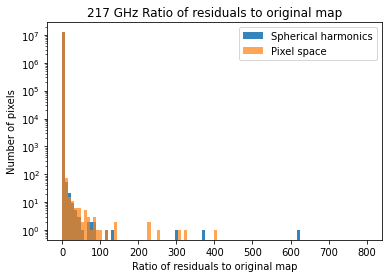

In [11]:
cf.ratio_histogram(index,ringed0,residual_alms0,residual_pixel0)
